In [ ]:
%pip install bokeh
%pip install jupyter_bokeh

In [1]:
import requests
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from collections import deque

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from bokeh.plotting import figure
from bokeh.io import push_notebook,show, output_notebook
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

# Utils

In [2]:

def polynomialRegression(dataframe, column, order):
    indexs_2 = np.array([i for i in range(len(dataframe[column].values))])
    indexs_2 = np.reshape(indexs_2, newshape=(1,-1))[0]

    RMSEs = []
    for i in range(order):
        features = PolynomialFeatures(degree=i+1)
        x_train_transformed = features.fit_transform(indexs_2.reshape(-1, 1))
        
        model = LinearRegression().fit(x_train_transformed, dataframe[column].values)

        train_pred = model.predict(x_train_transformed)
        rmse_poly_4_train = mean_squared_error(dataframe[column].values, train_pred, squared = False)
        RMSEs.append(rmse_poly_4_train)

    features = PolynomialFeatures(degree=RMSEs.index(min(RMSEs))+1)
    x_train_transformed = features.fit_transform(indexs_2.reshape(-1, 1))
    model = LinearRegression().fit(x_train_transformed, dataframe[column].values)

    x_test_transformed = features.fit_transform(indexs_2.reshape(-1, 1))

    train_pred = model.predict(x_train_transformed)

    test_pred = model.predict(x_test_transformed)
    
    dataframe[f'Poly_{column}'] = test_pred
    return test_pred        

# OHLCV Data

## Loading the data

In [3]:
SYMBOL = 'BTC'

In [4]:
response = requests.get(f'https://crypto-api.zlochteam.com/get-crypto-{SYMBOL}/change-candles?timeframe=15&indicators=true').json()
print(f'{response["total"]} records in the dataset for {SYMBOL}')

df = pd.DataFrame(response['data'])
df['Date'] = df['timestamp'].astype(int).apply(datetime.fromtimestamp)
df = df.set_index('Date')
df.tail()

2801 records in the dataset for BTC


,%D,%K,Acceleration,Bearish_engulfing,Bollinger_high,Bollinger_low,Bullish_engulfing,EMA100,EMA20,EMA200,...,RSI,Slope,Vortex_neg,Vortex_pos,close,high,low,open,symbol,timestamp
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-15 18:40:52,0.114540,0.169410,-126.00,0.0,29840.877601,30483.869399,0.0,29835.628954,30059.527292,29757.144395,...,51.942129,-1.04,0.681745,0.804510,30082.02,30159.28,30082.02,30149.73,BTC,1652632852
2022-05-15 18:56:20,0.176818,0.266764,93.63,0.0,29848.919087,30486.307913,0.0,29842.341450,30070.487550,29761.298282,...,55.811475,92.59,0.708431,0.773085,30174.61,30258.52,30152.41,30247.72,BTC,1652633780
2022-05-15 19:11:59,0.258947,0.340666,-11.93,0.0,29849.970642,30491.697358,0.0,29850.518253,30088.085879,29766.213423,...,58.914866,80.66,0.771136,0.740142,30255.27,30259.68,30207.40,30239.05,BTC,1652634719
2022-05-15 19:27:34,0.340848,0.415115,-80.58,0.0,29856.532648,30471.678352,0.0,29858.534724,30104.015795,29771.080454,...,58.917948,0.08,0.818859,0.726981,30255.35,30292.40,30231.81,30252.78,BTC,1652635654
2022-05-15 19:43:02,0.414682,0.488264,17.90,0.0,29872.842216,30437.084784,0.0,29866.748491,30120.140957,29776.077962,...,59.650492,17.98,0.863357,0.696006,30273.33,30275.17,30156.56,30168.33,BTC,1652636582


## Support resistances

## Plotting some graphs

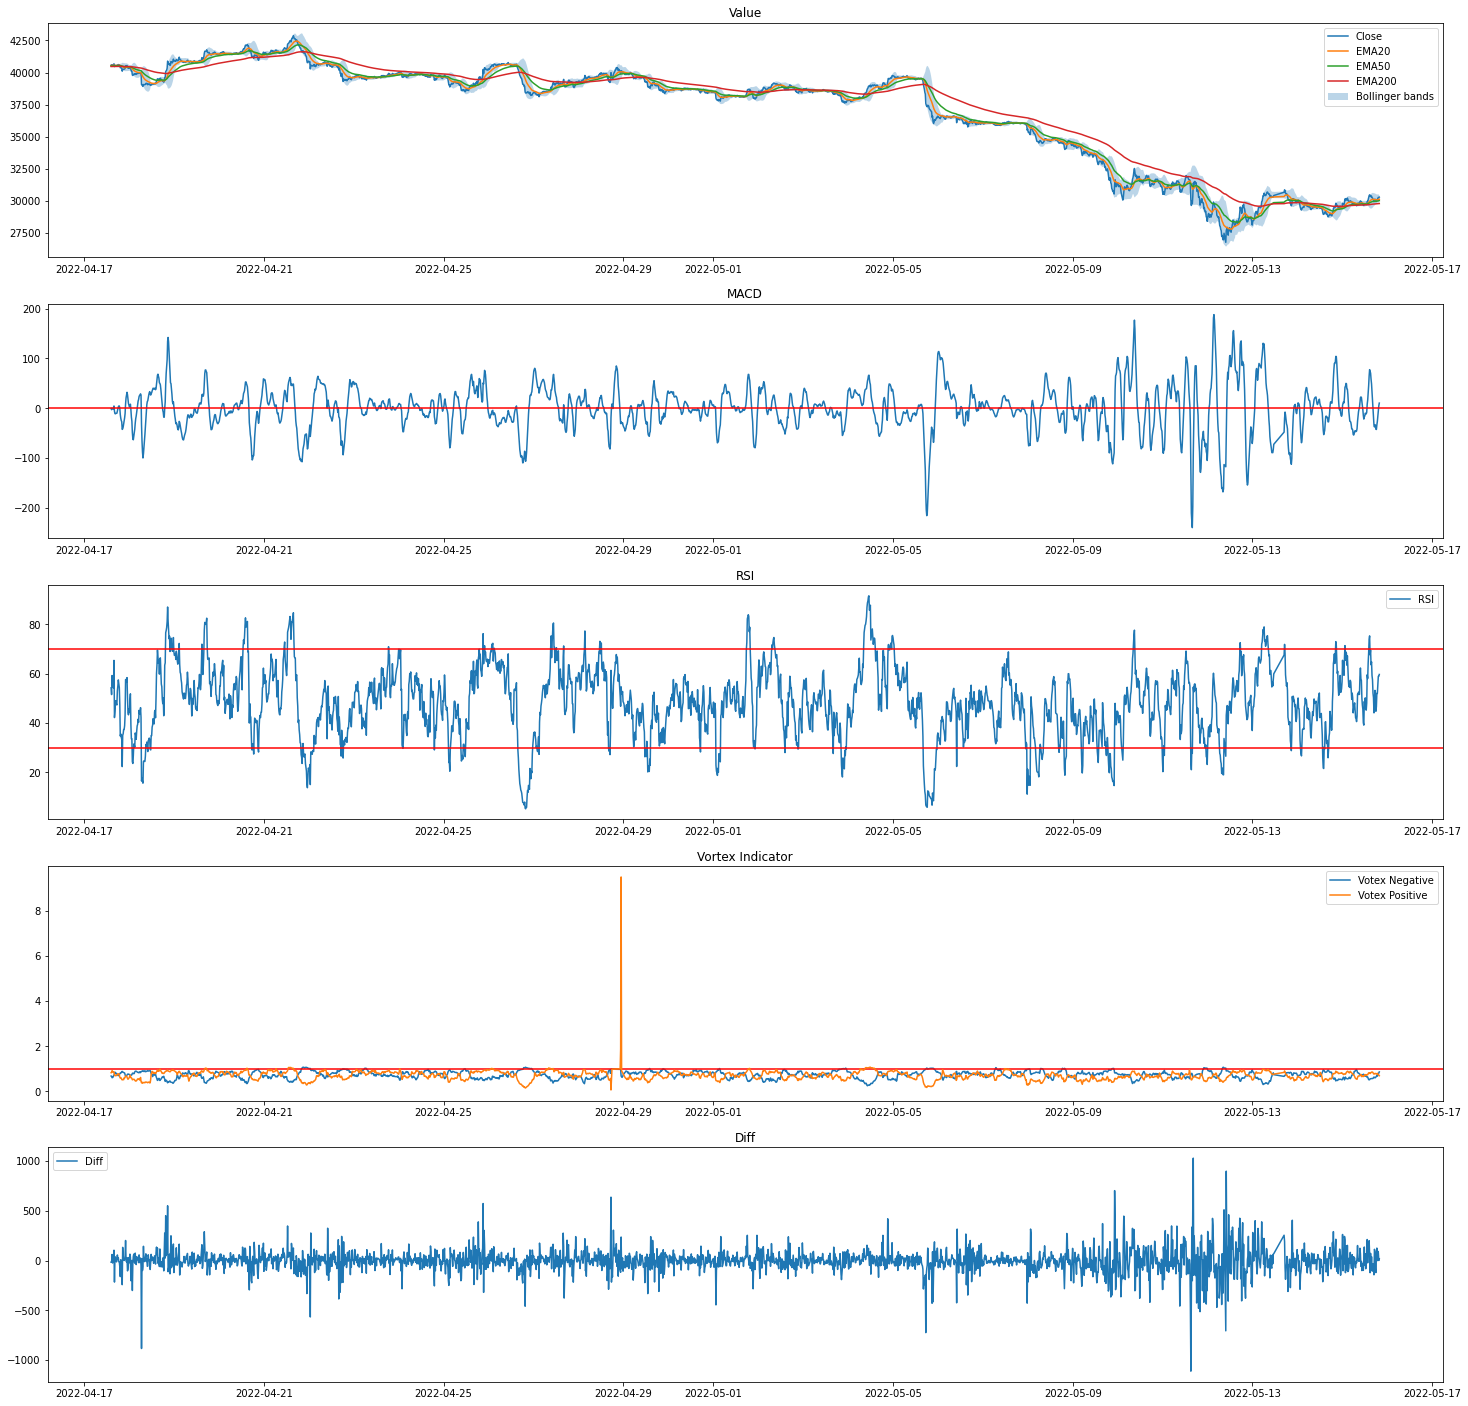

In [5]:
fig, ax1 = plt.subplots(5, 1,figsize=(25,25))
#fig.suptitle(f'Close')
ax1[0].plot(df.close, label='Close')
ax1[0].plot(df.EMA20, label='EMA20')
ax1[0].plot(df.EMA50, label='EMA50')
ax1[0].plot(df.EMA200, label='EMA200')
ax1[0].fill_between(df.index, df.Bollinger_low,df.Bollinger_high, label='Bollinger bands',alpha=0.3)
ax1[0].legend(loc="upper right")
ax1[0].set_title(f'Value')
ax1[2].plot(df.RSI, label='RSI')
ax1[2].axhline(y=70, color='r', linestyle='-')
ax1[2].axhline(y=30, color='r', linestyle='-')
ax1[2].set_title(f'RSI')
ax1[2].legend(loc="upper right")
ax1[1].plot(df.MACD, label='MACD_diff')
ax1[1].axhline(y=0, color='r', linestyle='-')
ax1[1].set_title(f'MACD')
ax1[3].plot(df['Vortex_neg'], label='Votex Negative')
ax1[3].axhline(y=1, color='r', linestyle='-')
ax1[3].plot(df['Vortex_pos'], label='Votex Positive')
ax1[3].set_title(f'Vortex Indicator')
ax1[3].legend(loc="upper right")
ax1[4].plot(df.Slope, label='Diff')
ax1[4].set_title(f'Diff')
ax1[4].legend(loc="upper left")

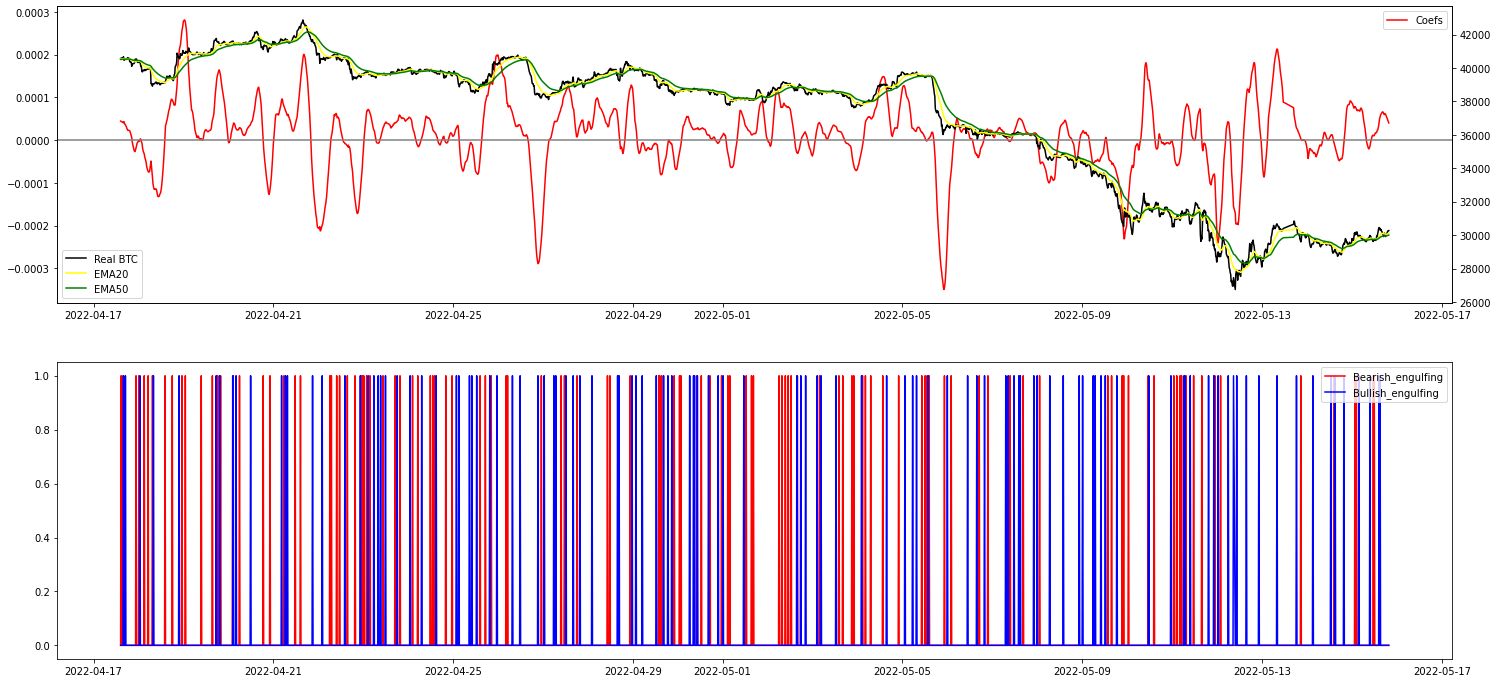

In [6]:
fig, ax_left = plt.subplots(2, figsize=(25,12))
ax_right = ax_left[0].twinx()

ax_left[0].plot(df.MLR, color='red',label='Coefs')
ax_left[0].axhline(y=0, color='gray', linestyle='-')
#ax_left[0].axhline(y=-0.04321911471488016, color='black', linestyle='-')
#ax_left[0].axhline(y=0.04321911471488016, color='black', linestyle='-')
ax_right.plot(df.close, color='black',label='Real BTC')
ax_right.plot(df.EMA20, color='yellow',label='EMA20')
ax_right.plot(df.EMA50, color='green',label='EMA50')
ax_left[0].legend(loc="upper right")
ax_right.legend(loc="lower left")
ax_left[1].plot(df.Bearish_engulfing, color='red',label='Bearish_engulfing')
ax_left[1].plot(df.Bullish_engulfing, color='blue',label='Bullish_engulfing')
ax_left[1].legend(loc="upper right")

In [9]:
df_2 = df.copy()
df_2['MLR_diff']=df_2['MLR'].diff()
df_2['BUY/SELL']=np.nan
#df_2['BUY/SELL']= df_2['BUY/SELL'].replace({'0': np.nan})
df_2.head()

,%D,%K,Acceleration,Bearish_engulfing,Bollinger_high,Bollinger_low,Bullish_engulfing,EMA100,EMA20,EMA200,...,Vortex_neg,Vortex_pos,close,high,low,open,symbol,timestamp,MLR_diff,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-17 14:24:19,0.546556,0.620480,-5.44,0.0,40428.510409,40643.852591,0.0,40496.101572,40540.986222,40472.321348,...,0.643861,0.790729,40576.59,40577.05,40547.25,40554.76,BTC,1650198259,NaN,NaN
2022-04-17 14:39:46,0.576288,0.587857,-28.20,1.0,40434.829069,40644.574931,0.0,40497.209066,40542.038011,40473.114469,...,0.637984,0.804789,40552.03,40601.64,40545.41,40587.70,BTC,1650199186,9.638414e-07,NaN
2022-04-17 14:55:09,0.612210,0.628293,74.09,0.0,40446.828430,40647.387570,0.0,40499.275421,40547.706772,40474.392534,...,0.580884,0.876404,40601.56,40608.90,40583.06,40587.71,BTC,1650200109,-2.988268e-06,NaN
2022-04-17 15:10:33,0.606394,0.603032,-70.19,0.0,40473.671458,40636.881542,0.0,40500.891749,40550.868032,40475.452310,...,0.585114,0.852849,40580.90,40588.03,40565.82,40568.37,BTC,1650201033,9.452309e-08,NaN
2022-04-17 15:25:52,0.589610,0.537505,9.12,0.0,40502.916335,40621.308665,0.0,40502.247556,40552.629171,40476.386715,...,0.602167,0.849899,40569.36,40654.59,40566.63,40606.03,BTC,1650201952,-3.755166e-06,NaN


In [10]:
position = 0

for i in range(4,len(df_2.index)):
    if position == 'opened':
        if df_2['MLR_diff'][i]>0 and df_2['MLR_diff'][i-1]<0:
            df_2['BUY/SELL'].iloc[i] = 0
            position = 'closed'
    else:     
        if df_2['MLR'][i]>0 and df_2['MLR'][i-1]>0 and df_2['MLR'][i-2]>0 and df_2['MLR'][i-3]>0 and df_2['MLR'][i-4]<0:
            df_2['BUY/SELL'].iloc[i] = 1
            position = 'opened'
df_2['BUY/SELL'].fillna(-1,inplace=True)            
df_2.head()  

/tmp/ipykernel_9164/521053350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['BUY/SELL'].iloc[i] = 1
/tmp/ipykernel_9164/521053350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['BUY/SELL'].iloc[i] = 0


,%D,%K,Acceleration,Bearish_engulfing,Bollinger_high,Bollinger_low,Bullish_engulfing,EMA100,EMA20,EMA200,...,Vortex_neg,Vortex_pos,close,high,low,open,symbol,timestamp,MLR_diff,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-17 14:24:19,0.546556,0.620480,-5.44,0.0,40428.510409,40643.852591,0.0,40496.101572,40540.986222,40472.321348,...,0.643861,0.790729,40576.59,40577.05,40547.25,40554.76,BTC,1650198259,NaN,-1.0
2022-04-17 14:39:46,0.576288,0.587857,-28.20,1.0,40434.829069,40644.574931,0.0,40497.209066,40542.038011,40473.114469,...,0.637984,0.804789,40552.03,40601.64,40545.41,40587.70,BTC,1650199186,9.638414e-07,-1.0
2022-04-17 14:55:09,0.612210,0.628293,74.09,0.0,40446.828430,40647.387570,0.0,40499.275421,40547.706772,40474.392534,...,0.580884,0.876404,40601.56,40608.90,40583.06,40587.71,BTC,1650200109,-2.988268e-06,-1.0
2022-04-17 15:10:33,0.606394,0.603032,-70.19,0.0,40473.671458,40636.881542,0.0,40500.891749,40550.868032,40475.452310,...,0.585114,0.852849,40580.90,40588.03,40565.82,40568.37,BTC,1650201033,9.452309e-08,-1.0
2022-04-17 15:25:52,0.589610,0.537505,9.12,0.0,40502.916335,40621.308665,0.0,40502.247556,40552.629171,40476.386715,...,0.602167,0.849899,40569.36,40654.59,40566.63,40606.03,BTC,1650201952,-3.755166e-06,-1.0


In [13]:
win_df = df_2.loc[df_2['BUY/SELL']!=0]
win_df['change']=win_df.close.pct_change()*100
win_df = win_df.loc[win_df['BUY/SELL']!='BUY']
win_df.dropna(inplace=True)
win_df.head(30)

/tmp/ipykernel_9164/1817499767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_df['change']=win_df.close.pct_change()*100


,%D,%K,Acceleration,Bearish_engulfing,Bollinger_high,Bollinger_low,Bullish_engulfing,EMA100,EMA20,EMA200,...,Vortex_pos,close,high,low,open,symbol,timestamp,MLR_diff,BUY/SELL,change
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-17 14:39:46,0.576288,5.878567e-01,-28.20,1.0,40434.829069,40644.574931,0.0,40497.209066,40542.038011,40473.114469,...,0.804789,40552.03,40601.64,40545.41,40587.70,BTC,1650199186,9.638414e-07,-1.0,-0.060528
2022-04-17 14:55:09,0.612210,6.282933e-01,74.09,0.0,40446.828430,40647.387570,0.0,40499.275421,40547.706772,40474.392534,...,0.876404,40601.56,40608.90,40583.06,40587.71,BTC,1650200109,-2.988268e-06,-1.0,0.122139
2022-04-17 15:10:33,0.606394,6.030316e-01,-70.19,0.0,40473.671458,40636.881542,0.0,40500.891749,40550.868032,40475.452310,...,0.852849,40580.90,40588.03,40565.82,40568.37,BTC,1650201033,9.452309e-08,-1.0,-0.050885
2022-04-17 15:25:52,0.589610,5.375054e-01,9.12,0.0,40502.916335,40621.308665,0.0,40502.247556,40552.629171,40476.386715,...,0.849899,40569.36,40654.59,40566.63,40606.03,BTC,1650201952,-3.755166e-06,-1.0,-0.028437
2022-04-17 15:41:07,0.541911,4.851950e-01,48.38,0.0,40510.608084,40623.532916,0.0,40504.306020,40557.731155,40477.678389,...,0.830865,40606.20,40639.20,40545.86,40624.57,BTC,1650202867,-2.352387e-06,-1.0,0.090807
2022-04-17 15:56:32,0.545470,6.137106e-01,12.23,0.0,40509.135699,40638.284301,0.0,40507.295406,40567.020569,40479.445470,...,0.891745,40655.27,40681.84,40599.34,40619.27,BTC,1650203792,5.360067e-07,-1.0,0.120844
2022-04-17 16:11:49,0.579998,6.410874e-01,-107.80,0.0,40520.453479,40635.834521,0.0,40509.062626,40569.831943,40480.610590,...,0.746216,40596.54,40599.31,40445.23,40493.50,BTC,1650204709,7.652812e-06,-1.0,-0.144459
2022-04-17 16:27:17,0.565957,4.430728e-01,-35.69,0.0,40509.132940,40641.470060,0.0,40508.925148,40563.383187,40480.824614,...,0.693563,40502.12,40503.71,40481.82,40493.18,BTC,1650205637,-1.271533e-08,-1.0,-0.232581
2022-04-17 16:42:38,0.403300,1.257407e-01,95.53,0.0,40499.318913,40639.918087,0.0,40508.812373,40557.654312,40481.047553,...,0.697540,40503.23,40554.96,40496.30,40552.81,BTC,1650206558,-8.341839e-06,-1.0,0.002741


In [15]:
print(f'\n- Total gain : {round(win_df.change.sum(),4)} %')
print(f'- Winrate : {round(100*np.where(win_df.change>0, 1,0).sum()/len(win_df.close),2)} %')
print(f'- Total trades : {len(win_df)}')


- Total gain : -34.631 %
- Winrate : 49.61 %
- Total trades : 2294


In [17]:
orders=[]
orders.append('NOTHING')
POSITION = -1 #-1 we are currently in SELL POSITION
MACD_Trigger=0
for i in range(len(df)-1):
    if df.MACD.values[i]>0 and df.MACD.values[i+1]<0:
        MACD_Trigger = -1 #We are going to SELL
    elif df.MACD.values[i]<0 and df.MACD.values[i+1]>0:
        MACD_Trigger = 1 #We are going to BUY
    
    if MACD_Trigger==1 and POSITION==-1 and df.EMA50.values[i+1]<df.EMA20.values[i+1]: #We should buy
        orders.append('BUY')
        POSITION = 1
    elif  POSITION==1  and df.close.values[i+1]<df.EMA50.values[i+1] :#MACD_Trigger ==-1 and  and df.EMA50.values[i+1]>df.EMA20.values[i+1]:
        orders.append('SELL')
        POSITION = -1
    else:
        orders.append('NOTHING')
    #if df.close.values[i]<df.EMA200.values[i]: #We are in a SELL configuration
    #    else:
    #        orders.append('NOTHING')
    #else:   #We are in a BUY configuration 
        #if df.EMA50.values[i+1]<df.EMA20.values[i+1] and df.close.values[i+1]>df.EMA20.values[i+1] and df.Vortex_pos.values[i+1]>1 and POSITION==-1:
        
        
df['orders']=orders
win_df = df[['orders','close']]
win_df = win_df.loc[win_df['orders']!='NOTHING']
print(win_df.head(10))
print(f'\n- Total gain : {round(win_df.close.pct_change().sum()*100,4)} %')
print(f'- Winrate : {round(100*np.where(win_df.close.pct_change()>0, 1,0).sum()/len(win_df.close.pct_change()),2)} %')
print(f'- Total trades : {win_df.close.count()}')

                    orders     close
Date                                
2022-04-17 14:55:09    BUY  40601.56
2022-04-17 16:27:17   SELL  40502.12
2022-04-17 18:15:47    BUY  40612.53
2022-04-17 19:02:39   SELL  40522.57
2022-04-18 19:33:25    BUY  40270.07
2022-04-20 03:33:09   SELL  41381.83
2022-04-20 07:57:47    BUY  41498.53
2022-04-20 10:01:21   SELL  41427.46
2022-04-20 11:03:36    BUY  41541.41
2022-04-20 16:13:08   SELL  41648.64

- Total gain : -24.4069 %
- Winrate : 45.31 %
- Total trades : 64


In [ ]:
_WINDOW_SIZE = 20

def scaleAndConstructData(self, dataframe):
  featuresScaler = StandardScaler()
  labelsScaler = StandardScaler()
  scaled_labels = labelsScaler.fit_transform(dataframe[[self._metric]])
  scaled_features = featuresScaler.fit_transform(dataframe[self._features])

  X_train = [scaled_features[i-self._WINDOW_SIZE:i,:] for i in range(self._WINDOW_SIZE, len(scaled_features)-2)]
  y_train = [scaled_labels[i+2] for i in range(self._WINDOW_SIZE, len(scaled_features)-2)]

  return np.array(X_train), np.array(y_train), featuresScaler, labelsScaler





## Prediction with tensorflow

### Classical one day prediction

In [ ]:
%pip install tensorflow_decision_forests --upgrade

Import all important packages

In [80]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, GRU, InputLayer, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.activations import relu
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, BinaryCrossentropy

Let's see the distribution of all columns to adjust the normalization procedure.

In [ ]:
import seaborn as sns

df_i = df.drop(['symbol','timestamp'],axis='columns')
n_rows=5
n_cols=4
# Create the subplots
#fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
    
    
fig, axes = plt.subplots(nrows = 5, ncols = 4,figsize=(25,25))    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(25, 25)

for ax, col in zip(axes, df_i.columns):
  sns.histplot(df_i[col], ax = ax)
  ax.set_title(col)

In [ ]:
import tensorflow_decision_forests as tfdf

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label="close")

# Train the model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

In [ ]:
# Look at the model.
model.summary()

# Evaluate the model.
model.evaluate(test_ds)

In [84]:
class ModelCrypto:
  def __init__(self, WINDOW_SIZE=10,metric="open",features=['%D', '%K', 'Acceleration','Bearish_engulfing','Bullish_engulfing', 
                                                            'Bollinger_high',
                                                            'Bollinger_low',
                                                            'EMA100', 'EMA20',
                                                            'EMA200', 'EMA50',
                                                            'FFT',
                                                            'MACD',
                                                            'MLR',
                                                            'RSI',
                                                            'Slope', 'Vortex_neg', 'Vortex_pos']):

    self._offset_prediction = 0
    self._WINDOW_SIZE = WINDOW_SIZE
    self._metric = metric
    self._features = features
    
    self._model = Sequential()
    self._model.add(InputLayer((WINDOW_SIZE, len(features))))
    self._model.add(LSTM(units = 64, return_sequences = True))
    self._model.add(LSTM(units = 32, return_sequences = True))
    for dilation_rate in (1,2,4,8,16,23):
      self._model.add(Conv1D(filters=32,kernel_size=2,dilation_rate=dilation_rate,strides=1,padding='causal',activation=keras.activations.relu))
    self._model.add(Conv1D(filters=1,kernel_size=1)) 
    self._model.add(Flatten())
    self._model.add(Dropout(0.2))
    self._model.add(Dense(units = 10,activation=keras.activations.relu))
    self._model.add(Dense(units = 5,activation=keras.activations.relu))
    self._model.add(Dense(units = 1,activation=keras.activations.linear))

    self._model.compile(optimizer = Adam(learning_rate=0.01), loss = 'mean_squared_error',metrics=[RootMeanSquaredError()])
    

    self._featuresScaler = StandardScaler()
    self._labelsScaler = StandardScaler()

  def trainModel(self,df_i):
    X_train, y_train, featuresScaler, labelsScaler = self.scaleAndConstructData(df_i)

    history = self._model.fit(X_train, y_train, epochs=15,validation_split=0.2,shuffle=True,batch_size=16)
    fig, ax1  = plt.subplots(1, 1,figsize=(15,4))
    ax1.plot(history.history['root_mean_squared_error'],label='Loss')
    ax1.plot(history.history['val_root_mean_squared_error'],label=f'Validation Loss')
    ax1.legend(loc='upper left')
      

  def scaleAndConstructData(self, dataframe):
    featuresScaler = StandardScaler()
    labelsScaler = StandardScaler()
    scaled_labels = labelsScaler.fit_transform(dataframe[[self._metric]])
    scaled_features = featuresScaler.fit_transform(dataframe[self._features])

    X_train = [scaled_features[i-self._WINDOW_SIZE:i,:] for i in range(self._WINDOW_SIZE, len(scaled_features)-2)]
    y_train = [scaled_labels[i+2] for i in range(self._WINDOW_SIZE, len(scaled_features)-2)]

    return np.array(X_train), np.array(y_train), featuresScaler, labelsScaler

  def evaluateModel(self, df_test):
    X_test, y_test, featuresScaler, labelsScaler = self.scaleAndConstructData(df_test)
    print('model\'s score : ',self._model.evaluate(X_test, y_test,batch_size=32))
    
    y_test_predicted = self._model.predict(X_test)

    y_test_predicted_inv = labelsScaler.inverse_transform(y_test_predicted)
    y_test_real_inv = labelsScaler.inverse_transform(y_test)
    y_test_real_inv = [y_test_real_inv[i][0] for i in range(len(y_test_real_inv))]
    y_test_predicted_inv = [y_test_predicted_inv[i][0] for i in range(len(y_test_predicted_inv))]

    p = figure(title=f"Prediction on {self._metric}", x_axis_label='time', y_axis_label='value ($)',x_axis_type='datetime',width=1500, height=600,)
    # Add the HoverTool to the figure
    p.add_tools(HoverTool(
        tooltips=[
        ("Price", "@y{0.00} $"),
        ("Date", "$x{%F}"),
    ], formatters={
            '$x': 'datetime',
            '$y' : 'printf',
        },
        mode='vline'
    ))
    p.line(df_test.index, y_test_real_inv, legend_label="real data", line_width=2, )
    p.line(df_test.index, y_test_predicted_inv, legend_label="prediction data", line_width=2, color='orange')
    p.legend.location = "top_left"

    show(p)
    
  def getModel(self):
    return self._model
    
  def saveModel(self, path='./model.h5'):
    self._model.save(path)

Epoch 1/15
105/105 [==============================] - 17s 92ms/step - loss: 0.1258 - root_mean_squared_error: 0.3547 - val_loss: 1.4690 - val_root_mean_squared_error: 1.2120
Epoch 2/15
105/105 [==============================] - 8s 78ms/step - loss: 0.0265 - root_mean_squared_error: 0.1629 - val_loss: 2.7532 - val_root_mean_squared_error: 1.6593
Epoch 3/15
105/105 [==============================] - 9s 85ms/step - loss: 0.0158 - root_mean_squared_error: 0.1256 - val_loss: 0.6132 - val_root_mean_squared_error: 0.7831
Epoch 4/15
105/105 [==============================] - 10s 96ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 2.8958 - val_root_mean_squared_error: 1.7017
Epoch 5/15
105/105 [==============================] - 10s 95ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 1.4454 - val_root_mean_squared_error: 1.2022
Epoch 6/15
105/105 [==============================] - 9s 83ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 2.80

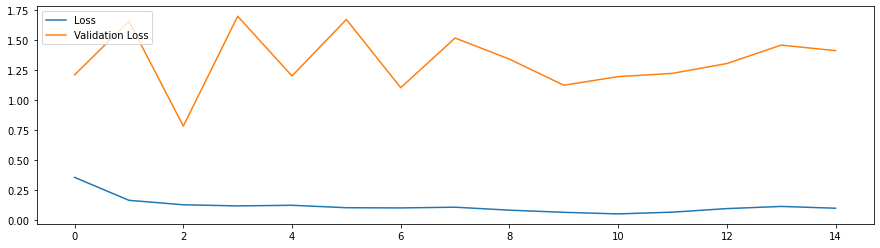

In [85]:
crypto_model = ModelCrypto(50,"FFT")
crypto_model.trainModel(df)

In [86]:
crypto_model.evaluateModel(df)

66/66 [==============================] - 2s 28ms/step - loss: 0.4054 - root_mean_squared_error: 0.6367
model's score :  [0.4054469168186188, 0.6367471218109131]


### 1D LSTM autoencoder

In [ ]:
class ModelCrypto1DAutoencoder:
  def __init__(self, WINDOW_SIZE=10,metric="close"):

    self._offset_prediction = 0
    self._WINDOW_SIZE = WINDOW_SIZE
    self._metric = metric
    #self._features = features
    
    #self._model = Sequential()
    #self._model.add(InputLayer((WINDOW_SIZE, 1)))
    #self._model.add(LSTM(units = 64, return_sequences = True))
    #for dilation_rate in (1,2,4,8,16,23):
    #  self._model.add(Conv1D(filters=32,kernel_size=2,dilation_rate=dilation_rate,strides=1,padding='causal',activation=keras.activations.relu))
    #self._model.add(Conv1D(filters=1,kernel_size=1)) 
    #self._model.add(Flatten())
    #self._model.add(Dropout(0.2))
    #self._model.add(Dense(units = 10,activation=keras.activations.relu))
    #self._model.add(Dense(units = 5,activation=keras.activations.relu))
    #self._model.add(Dense(units = 1,activation=keras.activations.linear))
#
    #self._model.compile(optimizer = Adam(learning_rate=0.01), loss = 'mean_squared_error',metrics=[RootMeanSquaredError()])
    

    
    
    self._model = keras.Sequential()
    self._model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, self._WINDOW_SIZE, 1), return_sequences=True, name='encoder_1'))
    self._model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
    self._model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
    self._model.add(keras.layers.RepeatVector(self._WINDOW_SIZE, name='encoder_decoder_bridge'))
    self._model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
    self._model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
    self._model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
    self._model.add(keras.layers.TimeDistributed(keras.layers.Dense(1)))
    self._model.compile(loss="mse",optimizer='adam',metrics=[RootMeanSquaredError()])
    self._model.build()
    #print(self._model.summary())

    self._featuresScaler = StandardScaler()
    self._labelsScaler = StandardScaler()

  def trainModel(self,df_i):
    X_train, y_train, featuresScaler, labelsScaler = self.scaleAndConstructData(df_i)
    early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)
    history = self._model.fit(X_train, y_train, epochs=20,validation_split=0.2,shuffle=True,batch_size=64,callbacks=[early_stop])
    fig, ax1  = plt.subplots(1, 1,figsize=(15,4))
    ax1.plot(history.history['root_mean_squared_error'],label='Loss')
    ax1.plot(history.history['val_root_mean_squared_error'],label=f'Validation Loss')
    ax1.legend(loc='upper left')
      

  def scaleAndConstructData(self, dataframe):
    featuresScaler = StandardScaler()
    labelsScaler = StandardScaler()
    scaled_labels = labelsScaler.fit_transform(dataframe[[self._metric]])
    scaled_features = featuresScaler.fit_transform(dataframe[[self._metric]])

    X_train = [scaled_features[i-self._WINDOW_SIZE:i,:] for i in range(self._WINDOW_SIZE, len(scaled_features))]
    y_train = [scaled_labels[i-self._WINDOW_SIZE:i,:] for i in range(self._WINDOW_SIZE, len(scaled_features))]

    return np.array(X_train), np.array(y_train), featuresScaler, labelsScaler

  #def evaluateModel(self, df_test):
  #  X_test, y_test, featuresScaler, labelsScaler = self.scaleAndConstructData(df_test)
  #  print('model\'s score : ',self._model.evaluate(X_test, y_test,batch_size=32))
  #  
  #  y_test_predicted = self._model.predict(X_test)
#
  #  y_test_predicted_inv = labelsScaler.inverse_transform(y_test_predicted)
  #  y_test_real_inv = labelsScaler.inverse_transform(y_test)
  #  y_test_real_inv = [y_test_real_inv[i][0] for i in range(len(y_test_real_inv))]
  #  y_test_predicted_inv = [y_test_predicted_inv[i][0] for i in range(len(y_test_predicted_inv))]
#
  #  p = figure(title=f"Prediction on {self._metric}", x_axis_label='time', y_axis_label='value ($)',x_axis_type='datetime',width=1500, height=600,)
  #  # Add the HoverTool to the figure
  #  p.add_tools(HoverTool(
  #      tooltips=[
  #      ("Price", "@y{0.00} $"),
  #      ("Date", "$x{%F}"),
  #  ], formatters={
  #          '$x': 'datetime',
  #          '$y' : 'printf',
  #      },
  #      mode='vline'
  #  ))
  #  p.line(df_test.index, y_test_real_inv, legend_label="real data", line_width=2, )
  #  p.line(df_test.index, y_test_predicted_inv, legend_label="prediction data", line_width=2, color='orange')
  #  p.legend.location = "top_left"
#
  #  show(p)
  #  
  def getModel(self):
    return self._model
    
  def saveModel(self, path='./model.h5'):
    self._model.save(path)

In [ ]:
BTCAE = ModelCrypto1DAutoencoder(20,metric='close')
BTCAE.trainModel(df.iloc[15000:])

# Whales Tracer

In [ ]:
#https://api.whaletrace.com/v1/HistoricTransactions?apiKey=cl2ng7kow00vd0117bw3r0aqx&type=BTC&from=2020-01-26T16:41:21Z&to=2020-01-27T16:41:21Z


# Order book Data

In [ ]:
%pip install polygon-api-client

In [ ]:
from polygon import RESTClient
from datetime import datetime

def main():
    key = "BMy33QfnSkPTBIQxjKZ9AKFOxSFDwIHN"

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.historic_trades_v2('AAPL',datetime.now())
        print(f"{resp}")


if __name__ == '__main__':
    main()

# Spectrogram from timeseries

In [ ]:
plt.specgram(df['close'][3000:4500], NFFT=512, Fs=1, noverlap=384, cmap='jet_r', mode='psd')
plt.colorbar()
plt.ylabel("Frequency")
plt.xlabel("days")
plt.ylim([0, 0.2])
plt.tight_layout()
plt.savefig('./spectrotimeseries2.png', bbox_inches='tight',pad_inches=0,)
plt.show()
